In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [17]:
path = r'D:\alessia\Instacart basket Analysis - Alessia'

In [18]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final.pkl'))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14   price_range_loc        object  
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

In [20]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,activity_of_customer,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High order customer,beverages


# 5.  PART II - Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

***Comment: please note I had to stop the excercise halfway. Now I need to complete it.***

**VARIABLE - AGE**

In [21]:
df.loc[df['Age']>60,'age_flag']='Senior'
df.loc[(df['Age']<=60) & (df['Age']>40),'age_flag']='Middle-age'
df.loc[df['Age']<=40,'age_flag']='Young adult'

In [22]:
df['age_flag'].value_counts(dropna=False)

Young adult    11148433
Senior         10112607
Middle-age      9703524
Name: age_flag, dtype: int64

***running some checks***

In [23]:
df['age_flag'].value_counts().sum()

30964564

In [24]:
df.shape

(30964564, 36)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14   price_range_loc        object  
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  avg_pr

**VARIABLE - INCOME**

In [26]:
df.loc[df['income']>100000,'income_flag']='High Income'
df.loc[(df['income']<=100000) & (df['income']>30000),'income_flag']='Middle Income'
df.loc[df['income']<=30000,'income_flag']='Low income'

***running checks***

In [27]:
df['income_flag'].value_counts(dropna=False)

Middle Income    16563404
High Income      14207028
Low income         194132
Name: income_flag, dtype: int64

In [28]:
df['income_flag'].value_counts().sum()

30964564

**VARIABLE - GOODS**

In [29]:
df.loc[1:3, ['department_id', 'department']]

,department_id,department
1,7,beverages
2,7,beverages
3,7,beverages


**VARIABLE - FAMILY STATUS**

In [30]:
df.loc[1:3, ['n_dependants', 'fam_status']]

,n_dependants,fam_status
1,3,married
2,3,married
3,3,married


In [31]:
df.loc[df ['n_dependants']==0,'kids_flag']='no-kids'
df.loc[df ['n_dependants']!=0,'kids_flag']='kids'

***check it all***

In [32]:
df['kids_flag'].value_counts(dropna=False)

kids       23224883
no-kids     7739681
Name: kids_flag, dtype: int64

In [33]:
df['kids_flag'].value_counts().sum()

30964564

# 6. Create an appropriate visualization to show the distribution of profiles.

**Age profile**

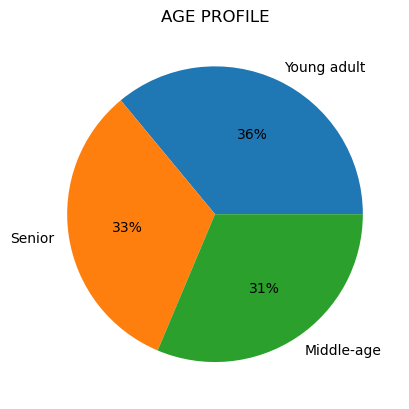

In [34]:
age_profile=df['age_flag'].value_counts().plot.pie(title='AGE PROFILE',label='',autopct=('%1.f%%'))

**Income profile**

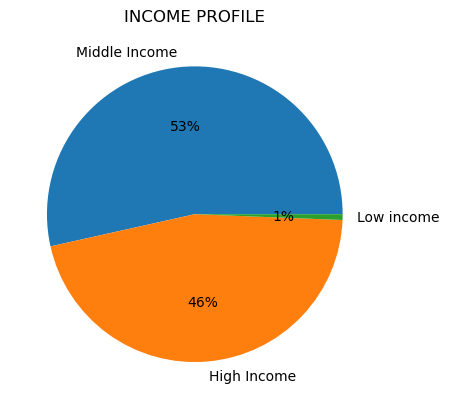

In [35]:
income_profile=df['income_flag'].value_counts().plot.pie(title='INCOME PROFILE',label='',autopct=('%1.f%%'))

**Goods profile**

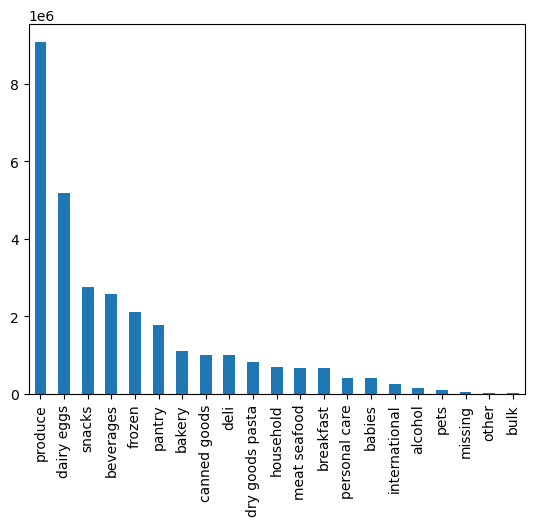

In [36]:
goods_profile = df ['department'].value_counts().plot.bar()

**Family status profile**

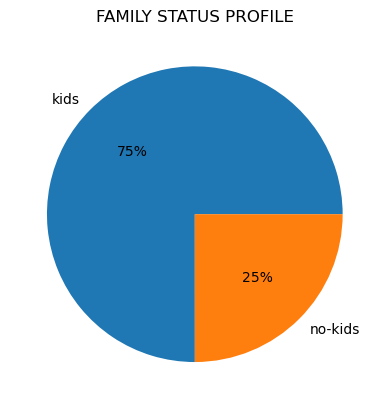

In [37]:
family_status_profile=df['kids_flag'].value_counts().plot.pie(title='FAMILY STATUS PROFILE',label='',autopct=('%1.f%%'))

**Exporting everything**

In [39]:
age_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_profile.png'))

In [40]:
income_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_profile.png'))

In [41]:
goods_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','goods_profile.png'))

In [42]:
family_status_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_profile.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## Age

In [43]:
age_stats=df.groupby(['age_flag']).agg({'days_since_prior_order':['min','max','mean'],'prices':['min','max','mean']})

In [44]:
age_stats

days_since_prior_order                  prices                    
                               min   max       mean    min      max       mean
age_flag                                                                      
Middle-age                     0.0  30.0  10.826162    1.0  99999.0  11.894440
Senior                         0.0  30.0  10.791879    1.0  99999.0  11.806149
Young adult                    0.0  30.0  10.813201    1.0  99999.0  12.083075

## Income

In [45]:
income_stats=df.groupby(['income_flag']).agg({'days_since_prior_order':['min','max','mean'],'prices':['min','max','mean']})

In [46]:
income_stats

days_since_prior_order                  prices           \
                                 min   max       mean    min      max   
income_flag                                                             
High Income                      0.0  30.0  10.769663    1.0  99999.0   
Low income                       0.0  30.0  11.595375    1.0     25.0   
Middle Income                    0.0  30.0  10.836047    1.0  99999.0   

                          
                    mean  
income_flag               
High Income    16.461733  
Low income      6.532439  
Middle Income   8.112814

## Goods

In [47]:
goods_stats=df.groupby(['department']).agg({'days_since_prior_order':['min','max','mean'],'prices':['min','max','mean']})

In [48]:
goods_stats

days_since_prior_order                  prices           \
                                   min   max       mean    min      max   
department                                                                
alcohol                            0.0  30.0  10.006658    1.0     15.0   
babies                             0.0  30.0   9.780844    1.0     15.0   
bakery                             0.0  30.0  10.808401    1.0     15.0   
beverages                          0.0  30.0  10.768469    1.0     15.0   
breakfast                          0.0  30.0  11.001313    1.0     14.9   
bulk                               0.0  30.0   9.880211    1.4     14.1   
canned goods                       0.0  30.0  11.316872    1.0     15.0   
dairy eggs                         0.0  30.0  10.709201    1.0  99999.0   
deli                               0.0  30.0  11.051389    1.0     15.0   
dry goods pasta                    0.0  30.0  11.440362    1.0     15.0   
frozen                             0.0  30.0  11.413880    1.0     15.0   
household                          0.0  30.0  11.649305    1.0     15.0   
international                      0.0  30.0  10.963731    1.0     15.0   
meat seafood                       0.0  30.0  11.123647    8.0     25.0   
missing                            0.0  30.0   9.869551    1.0     15.0   
other                              0.0  30.0  10.624647    1.1     15.0   
pantry                             0.0  30.0  10.835976    1.0     20.0   
personal care                      0.0  30.0  11.256240    1.0     15.0   
pets                               0.0  30.0  11.593531    1.0     15.0   
produce                            0.0  30.0  10.574119    1.0     15.0   
snacks                             0.0  30.0  10.671110    1.6      7.0   

                            
                      mean  
department                  
alcohol           8.150699  
babies            7.634399  
bakery            7.857482  
beverages         7.682556  
breakfast         8.031647  
bulk              8.346919  
canned goods      7.546660  
dairy eggs       33.114599  
deli              7.783347  
dry goods pasta   7.349370  
frozen            7.733725  
household         7.379951  
international     7.678797  
meat seafood     16.300034  
missing           8.660655  
other             6.961995  
pantry            8.014482  
personal care     7.998744  
pets              7.887489  
produce           7.980348  
snacks            4.275555

## Family status

In [49]:
family_status_stats=df.groupby(['kids_flag']).agg({'days_since_prior_order':['min','max','mean'],'prices':['min','max','mean']})

In [50]:
family_status_stats

days_since_prior_order                  prices                    
                             min   max       mean    min      max       mean
kids_flag                                                                   
kids                         0.0  30.0  10.816416    1.0  99999.0  11.877157
no-kids                      0.0  30.0  10.791951    1.0  99999.0  12.102657

# 8+9. Profiles by Region and Departments

## Age by Region

In [51]:
region_age=pd.crosstab(df['Region'],df['age_flag'],dropna=False)


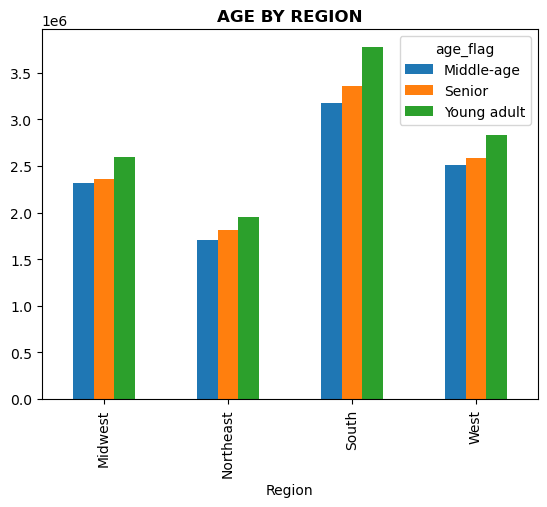

In [52]:
regions_age=region_age.plot.bar()
plt.title('AGE BY REGION',fontweight='bold')
plt.show()


## Age by Department

In [53]:
department_age=pd.crosstab(df['department'],df['age_flag'],dropna=False)

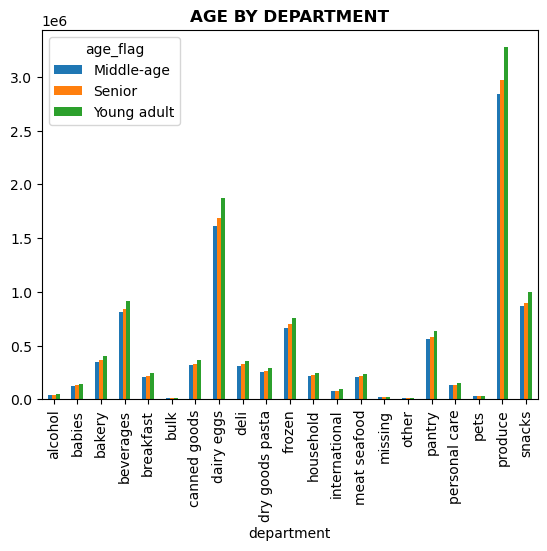

In [54]:
departments_age=department_age.plot.bar()
plt.title('AGE BY DEPARTMENT',fontweight='bold')
plt.show()

## Income by region

In [55]:
region_income=pd.crosstab(df['Region'],df['income_flag'],dropna=False)

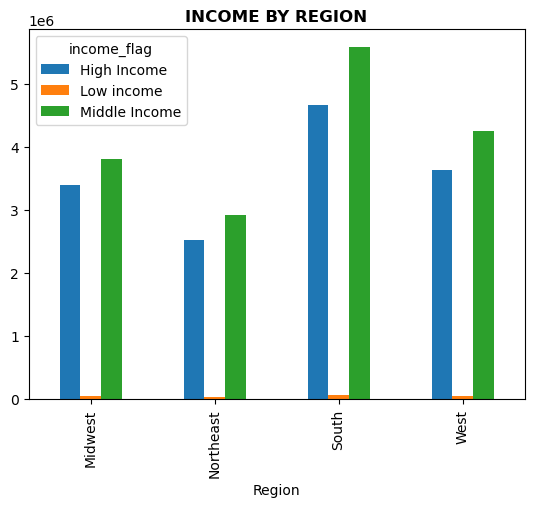

In [56]:
regions_income=region_income.plot.bar()
plt.title('INCOME BY REGION',fontweight='bold')
plt.show()

## Income by department

In [57]:
department_income=pd.crosstab(df['department'],df['income_flag'],dropna=False)

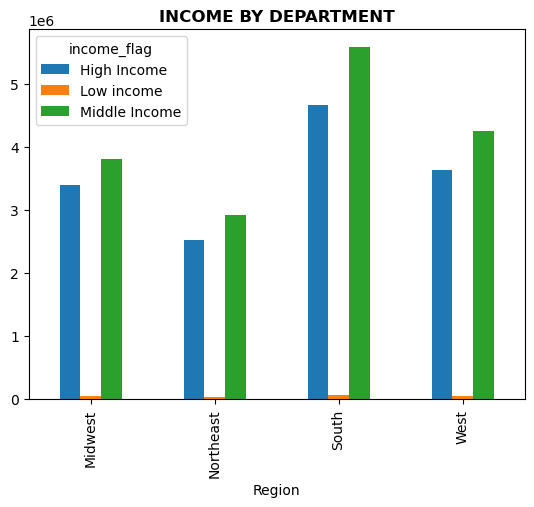

In [58]:
departments_income=region_income.plot.bar()
plt.title('INCOME BY DEPARTMENT',fontweight='bold')
plt.show()

## Family status by region

In [59]:
region_family_status=pd.crosstab(df['Region'],df['kids_flag'],dropna=False)

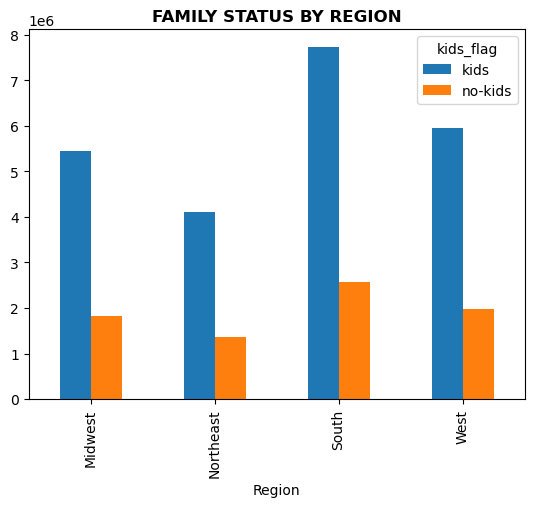

In [60]:
region_family_statuss=region_family_status.plot.bar()
plt.title('FAMILY STATUS BY REGION',fontweight='bold')
plt.show()

## Family status by department

In [61]:
department_family_status=pd.crosstab(df['department'],df['kids_flag'],dropna=False)

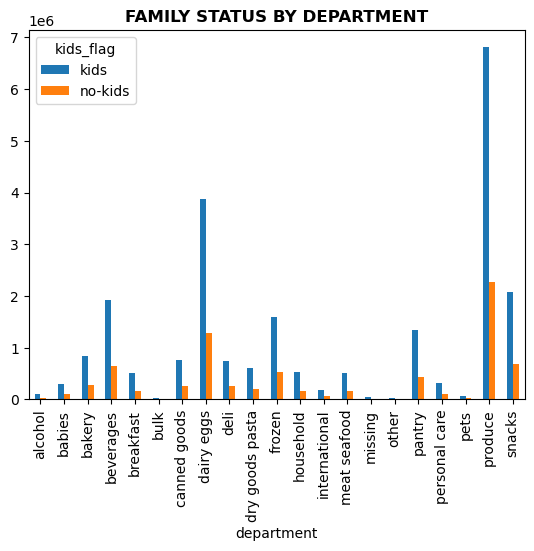

In [62]:
department_family_statuss=department_family_status.plot.bar()
plt.title('FAMILY STATUS BY DEPARTMENT',fontweight='bold')
plt.show()

**Exporting**

In [63]:
regions_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_by_region.png'))

In [64]:
departments_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_by_department.png'))

In [65]:
regions_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_by_region.png'))

In [66]:
departments_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_by_department.png'))

In [67]:
region_family_statuss.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_by_region.png'))

In [68]:
department_family_statuss.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_by_department.png'))